# 02 - Cleaning and EDA

In [83]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = 'deep')

import re

In [84]:
# Read data

vegan = pd.read_csv('../data/vegan.csv')
plant = pd.read_csv('../data/plant.csv')

In [85]:
# View vegan
vegan.head()

,title,selftext,created_utc
0,How do I get involved in Direct Action activism?,NaN,1679864469
1,Is it vegan to buy non-vegan food with 'too go...,'Vegan' friend of mine did. And i honestly was...,1679864006
2,Hmmmm,NaN,1679863672
3,has any damage been done if i haven’t been sup...,[removed],1679862449
4,Trying to be a vegatarian,[removed],1679861712


In [86]:
# View plant
plant.head()

,title,selftext,created_utc
0,Help me explain to my friend why this is quack...,https://www.instagram.com/p/CqQ7ACOvBpe/?igshi...,1679863453
1,Sunday Breakfast. steel cut oats with cinnamon...,NaN,1679844779
2,does anyone know what is this in my bag of qui...,NaN,1679842952
3,First 24 hours meat/cheese free,[removed],1679833521
4,High cholesterol low triglycerides on my diet?!,"Hello there,\n\nI’ve been on wfpb diet for yea...",1679826189


In [87]:
# Vegan columns
vegan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99952 entries, 0 to 99951
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        99951 non-null  object
 1   selftext     57872 non-null  object
 2   created_utc  99952 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [88]:
# Plant columns
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29991 entries, 0 to 29990
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        29991 non-null  object
 1   selftext     17063 non-null  object
 2   created_utc  29991 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 703.0+ KB


In [89]:
#  We have plenty of posts with self-text, so drop all nulls
vegan.dropna(inplace=True)
plant.dropna(inplace=True)

# Shape of remaining data
vegan.shape, plant.shape

((57872, 3), (17063, 3))

In [90]:
# Drop duplicate selftext
vegan.drop_duplicates(subset = 'selftext', keep = 'first', inplace=True)
plant.drop_duplicates(subset = 'selftext', keep = 'first', inplace=True)

# Shape of remaining data
vegan.shape, plant.shape

((27558, 3), (10290, 3))

In [91]:
# Cleaning data

for df in [vegan,plant]:
    # remove leading and trailing spaces
    df['selftext'] = df['selftext'].str.strip() 
    df['title'] = df['title'].str.strip() 
        
    # remove URLs
    df['selftext'] = df['selftext'].apply(lambda x: re.sub('http\S+','',x))
    df['title'] = df['title'].apply(lambda x: re.sub('http\S+','',x)) 

    
    # remove non-ASCII characters
    df['selftext'] = df['selftext'].apply(lambda x: re.sub('[^\x00-\x7F]+','',x))
    df['title'] = df['title'].apply(lambda x: re.sub('[^\x00-\x7F]+','',x)) 

        
    # remove letters repeated more than twice
    df['selftext'] = df['selftext'].apply(lambda x: re.sub('[^\x00-\x7F]+','',x))
    df['title'] = df['title'].apply(lambda x: re.sub('[A-Za-z]\2+','[A-Za-z]\2',x)) 
 

        # remove anything in square brackets (some of the most common are [removed] and [deleted]!)
    df['selftext'] = df['selftext'].apply(lambda x: re.sub('\[[^\]]*\]','',x))
    df['title'] = df['title'].apply(lambda x: re.sub('\[[^\]]*\]','',x)) 
    
        
        # remove '\n'
    df['selftext'] = df['selftext'].apply(lambda x: re.sub('\\n','',x))
    df['title'] = df['title'].apply(lambda x: re.sub('\\n','',x)) 
        
        # remove '&amp;'
    df['selftext'] = df['selftext'].apply(lambda x: re.sub('\&amp;','',x))
    df['title'] = df['title'].apply(lambda x: re.sub('\&amp;','',x)) 

        
        # remove / and separate words connected by /
    df['selftext'] = df['selftext'].apply(lambda x: re.sub('\/',' ',x))
    df['title'] = df['title'].apply(lambda x: re.sub('\/',' ',x)) 

In [92]:
# Create columns for length of posts (characters)
for df in [vegan,plant]:
    df['post_length'] = df['selftext'].apply(lambda x: len(x))
    df['title_length'] = df['title'].apply(lambda x: len(x))

# Create columns for length of posts (words - number of spaces, min 1)
for df in [vegan,plant]:
    df['post_words'] = df['selftext'].apply(lambda x: x.count(' ') + 1)
    df['title_words'] = df['title'].apply(lambda x: x.count(' ') + 1)

In [93]:
# View values of post character lengths

for df in [vegan,plant]:
    print(f"{df['post_length'].value_counts().head()}\n")

1      915
7      180
0       65
392     52
175     51
Name: post_length, dtype: int64

1      45
292    28
252    26
245    25
169    25
Name: post_length, dtype: int64



In [94]:
#  View values of word count

for df in [vegan,plant]:
    print(f"{df['post_words'].value_counts().head()}\n")

1     1226
62     232
34     206
64     199
53     197
Name: post_words, dtype: int64

42    105
30    105
44    101
45     98
43     97
Name: post_words, dtype: int64



In [95]:
# View values of title character length

for df in [vegan,plant]:
    print(f"{df['title_length'].value_counts().head()}\n")

27    540
26    533
33    526
24    519
30    506
Name: title_length, dtype: int64

25    238
26    230
30    220
29    212
31    209
Name: title_length, dtype: int64



In [96]:
# View values of title word count

for df in [vegan,plant]:
    print(f"{df['title_words'].value_counts().head()}\n")

5    2751
4    2668
6    2553
3    2430
7    2335
Name: title_words, dtype: int64

5    1056
4    1040
6    1011
3     951
7     925
Name: title_words, dtype: int64



In [97]:
#  Remove posts with posts shorter than 3 words

vegan = vegan.loc[vegan['post_words'] > 3, :]
plant = plant.loc[plant['post_words'] > 3, :]

## Viewing Distributions - Length (char) and Word Count for Post and Title

In [102]:
vegan.describe()

,created_utc,post_length,title_length,post_words,title_words
count,2.622800e+04,26228.000000,26228.000000,26228.000000,26228.000000
mean,1.647714e+09,658.443038,47.918103,120.720070,8.418713
std,1.660876e+07,751.137756,33.440471,137.531038,6.160540
min,1.619512e+09,12.000000,0.000000,4.000000,1.000000
25%,1.634134e+09,245.000000,26.000000,46.000000,4.000000
50%,1.647028e+09,450.000000,40.000000,83.000000,7.000000
75%,1.661106e+09,814.000000,61.000000,150.000000,11.000000
max,1.679864e+09,20889.000000,298.000000,5603.000000,61.000000


In [103]:
plant.describe()

,created_utc,post_length,title_length,post_words,title_words
count,1.016400e+04,10164.000000,10164.000000,10164.000000,10164.000000
mean,1.578794e+09,593.914502,45.519776,109.601830,7.993998
std,5.991157e+07,750.058890,30.582020,135.581776,5.702595
min,1.340512e+09,12.000000,0.000000,4.000000,1.000000
25%,1.538051e+09,224.000000,25.000000,42.000000,4.000000
50%,1.577648e+09,405.000000,39.000000,76.000000,7.000000
75%,1.622994e+09,720.000000,57.000000,133.000000,10.000000
max,1.679863e+09,22147.000000,299.000000,3906.000000,60.000000


In [104]:
# View 95th percentiles to determine scale for histograms 
for df in [vegan,plant]:
    print(df['post_length'].quantile(.95),df['post_words'].quantile(.95))
    print(df['title_length'].quantile(.95),df['title_words'].quantile(.95))
    

1861.0 340.0
108.64999999999782 20.0
1656.4000000000015 305.85000000000036
101.0 18.0


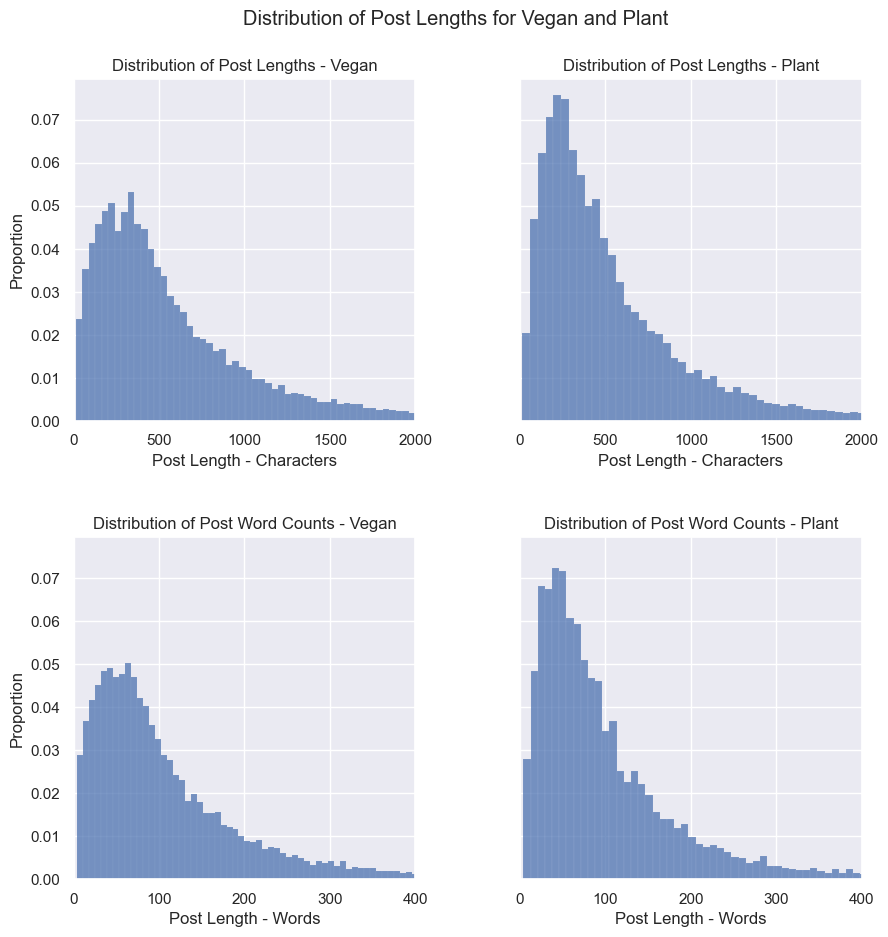

In [105]:
fig, axs = plt.subplots(2,2,figsize = (10,10),sharey=True)
plt.tight_layout(pad = 5)
plt.suptitle('Distribution of Post Lengths for Vegan and Plant')
plt.title('Character Count, Word Count')
for idx, df in enumerate([vegan,plant]):
    sns.histplot(df['post_length'],
                ax = axs[0][idx],
                stat = 'proportion')
    sns.histplot(df['post_words'],
                ax = axs[1][idx],
                stat = 'proportion')
    axs[0][idx].set_xlim(0,2000)
    axs[1][idx].set_xlim(0,400)
    axs[0][idx].set_xlabel('Post Length - Characters')
    axs[1][idx].set_xlabel('Post Length - Words')
axs[0][0].set_title('Distribution of Post Lengths - Vegan')
axs[0][1].set_title('Distribution of Post Lengths - Plant')
axs[1][0].set_title('Distribution of Post Word Counts - Vegan')
axs[1][1].set_title('Distribution of Post Word Counts - Plant');

Since there is a lower bound of 0 (or actually 3 words) and no upper bound, it is not surprising that all of these distributions are skewed to the right.  Interestingly, plant posts have a much higher proportion of posts under 100 words or 500 characters (which is reflected in their lower mean and median for character count and word count).

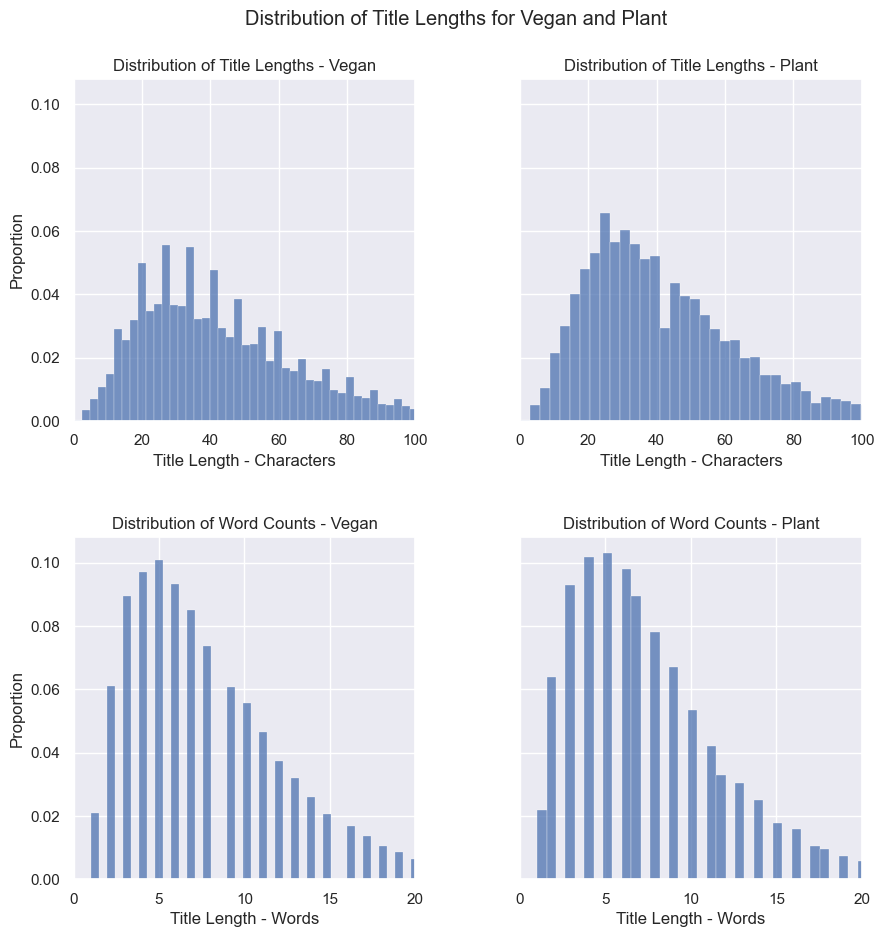

In [106]:
fig, axs = plt.subplots(2,2,figsize = (10,10),sharey=True)
plt.tight_layout(pad = 5)
plt.suptitle('Distribution of Title Lengths for Vegan and Plant')
plt.title('Character Count, Word Count')
for idx, df in enumerate([vegan,plant]):
    sns.histplot(df['title_length'],
                ax = axs[0][idx],
                stat = 'proportion')
    sns.histplot(df['title_words'],
                ax = axs[1][idx],
                stat = 'proportion')
    axs[0][idx].set_xlim(0,100)
    axs[1][idx].set_xlim(0,20)
    axs[0][idx].set_xlabel('Title Length - Characters')
    axs[1][idx].set_xlabel('Title Length - Words')
axs[0][0].set_title('Distribution of Title Lengths - Vegan')
axs[0][1].set_title('Distribution of Title Lengths - Plant')
axs[1][0].set_title('Distribution of Word Counts - Vegan')
axs[1][1].set_title('Distribution of Word Counts - Plant');

Plant titles tend to be longer in character count, but comparable in word count.  This suggests that plant posts have titles with longer words on average. 

## Viewing Distributions - Length of Avg Words

In [107]:
for df in [vegan,plant]:
    df['avg_word_post'] = df['post_length']/df['post_words']
    df['avg_word_title'] = df['title_length']/df['title_words']

Text(0.5, 1.0, 'Distribution of Title Avg Word Lengths - Plant')

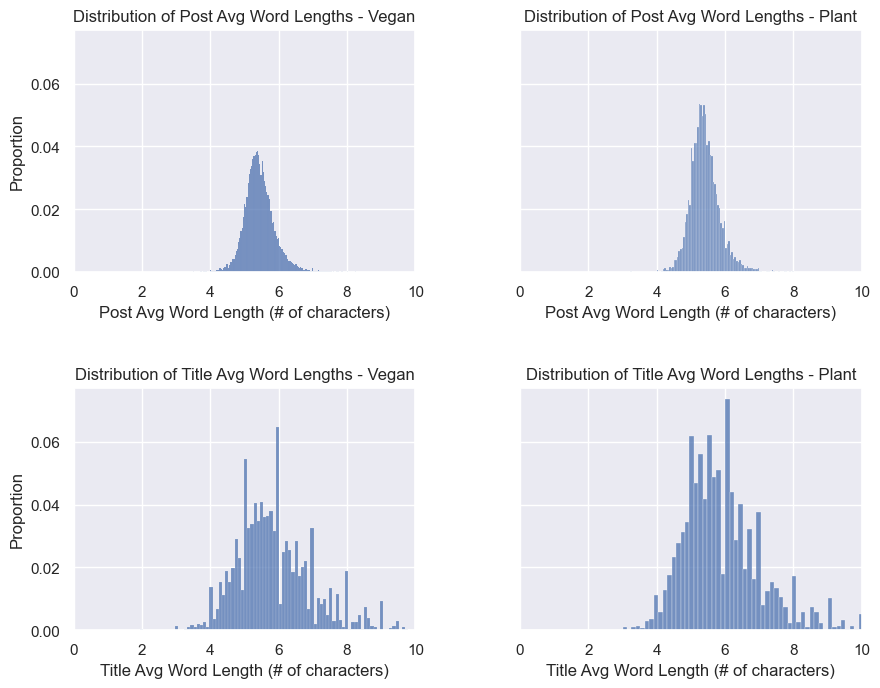

In [108]:
fig, axs = plt.subplots(2,2, figsize=(10,8),sharex=False,sharey=True)
plt.tight_layout(pad = 5)

for idx,df in enumerate([vegan,plant]):
    sns.histplot(df['avg_word_post'],
                ax = axs[0][idx],
                stat = 'proportion')
    axs[0][idx].set_xlim(0,10)
    axs[0][idx].set_xlabel('Post Avg Word Length (# of characters)')

axs[0][0].set_title('Distribution of Post Avg Word Lengths - Vegan')
axs[0][1].set_title('Distribution of Post Avg Word Lengths - Plant')
    
for idx,df in enumerate([vegan,plant]):
    sns.histplot(df['avg_word_title'],
                ax = axs[1][idx],
                stat = 'proportion')
    axs[1][idx].set_xlim(0,10)
    axs[1][idx].set_xlabel('Title Avg Word Length (# of characters)')
    
axs[1][0].set_title('Distribution of Title Avg Word Lengths - Vegan')
axs[1][1].set_title('Distribution of Title Avg Word Lengths - Plant')


Plant posts have a slightly higher median word length, and the distribution is more tightly packed around the median (i.e. standard deviation is lower). 

Plant titles also have a slightly higher median word length with a denser distribution close to the median.  

The distributions of titles do not fit a normal distribution as neatly as the distributions of posts.  This is likely due to the fact that we have more data for posts than titles (posts generally have more words than titles - especially since we removed all posts with 3 or fewer words). 

##  Lengths of Posts Containg "recipe"

One of the greatest challenges for people on vegan and plant-based diets is finding new and creative dishes to cook at home, especially when many restaurants do not adequately cater to their diets.  Let's look at word lengths of posts where the title contains the word "recipe." 

In [109]:
recipe_v = vegan[vegan['title'].str.contains('recipe',case=False)] 

In [110]:
no_recipe_v = vegan[vegan['title'].str.contains('recipe',case=False) == False] 

In [111]:
recipe_p = plant[plant['title'].str.contains('recipe',case=False)] 

In [112]:
no_recipe_p = plant[plant['title'].str.contains('recipe',case=False) == False] 

In [113]:
len(recipe_v),len(no_recipe_v),len(recipe_p),len(no_recipe_p)

(601, 25627, 606, 9558)

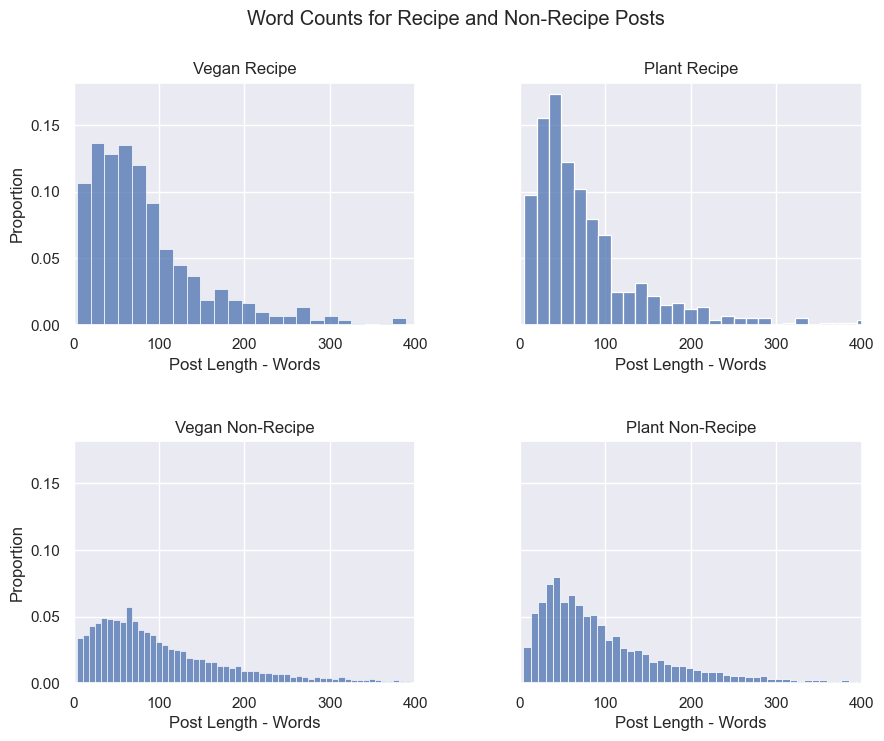

In [114]:
fig, axs = plt.subplots(2,2,figsize = (10,8), sharey=True)
plt.tight_layout(pad = 5)

plt.suptitle('Word Counts for Recipe and Non-Recipe Posts')
plt.title('Vegan and Plant')

sns.histplot(recipe_v['post_words'], 
             ax = axs[0][0],
             stat = 'proportion')

for i in range(2):
    for j in range(2):
        axs[i][j].set_xlim(0,400)
        axs[i][j].set_xlabel('Post Length - Words')

axs[0][0].set_title('Vegan Recipe')
axs[0][1].set_title('Plant Recipe')
axs[1][0].set_title('Vegan Non-Recipe')
axs[1][1].set_title('Plant Non-Recipe')

sns.histplot(recipe_p['post_words'], 
             ax = axs[0][1],
             stat = 'proportion')

sns.histplot(no_recipe_v['post_words'], 
             ax = axs[1][0],
             stat = 'proportion')

sns.histplot(no_recipe_p['post_words'], 
             ax = axs[1][1],
             stat = 'proportion');

Posts containing recipes are more tightly distributed at lengths under 100 words.

There is a much starker contrast between recipe and non-recipe posts for vegan than plant.  Vegan recipes are more uniformly distributed between 0 and 100 words, while plant recipes spike around 40 words.

With respect to non-recipe posts, we have already seen a trend toward longer posts in vegan, and the difference between recipe and non-recipe posts in vegan is more of a reflection of the greater proportion of non-recipe posts.  (Interestingly, there is almost an identical number of recipe posts for vegan and plant despite the fact that the total vegan set is more than double in size).   

In [120]:
# Write clean data to data folder

vegan.to_csv('../data/vegan_clean.csv',index = False)
plant.to_csv('../data/plant_clean.csv',index = False)